# Credit Score Classification with RNN
# Sepideh Forouzi
# I. Introduction

The classification of credit scores is a critical task in the financial services industry, enabling banks and lending institutions to assess the creditworthiness of individuals. Traditional methods often rely on manual processes and rule-based systems, which are time-consuming and prone to error. With recent advancements in Artificial Intelligence (AI) and Machine Learning (ML), particularly Deep Learning, these processes can be automated to significantly improve accuracy and efficiency.

---

## 1. Problem Statement

Based on data collected over the past few years by a global finance company, management aims to build an intelligent system to automatically segregate individuals into credit score brackets, thereby reducing manual effort.  
The objective is to develop an intelligent classification system that categorizes individuals into predefined credit score groups.

---

## 2. Project Aim

This project aims to design and implement a **Neural Network–based multi-class classification model** to categorize individuals into three credit score brackets: **Poor**, **Standard**, and **Good**.  
By leveraging data-driven insights, the model seeks to minimize manual evaluation efforts and enhance decision-making in credit risk assessment.

---

## 3. Project Scope

The primary scope of this project includes:

- Developing an intelligent classification system for predefined credit score brackets  
- Reducing manual effort through automated machine learning–based classification  
- Adopting Neural Network models for multi-class classification to capture complex, non-linear relationships within the data  

This system can support financial institutions in **risk management**, **loan approval**, and **customer segmentation** by providing scalable and accurate predictions.

---

## 4. Dataset

The dataset was obtained from an open Kaggle competition provided by a global finance company. It contains customer banking details and extensive credit-related information.

- **Dataset size:** 100,000 rows  
- **Total features:** 27  
- **Removed redundant columns:** `ID`, `Customer_ID`, `Name`, `SSN`, `Month`  
- **Feature composition:**  
  - 17 numerical features  
  - 9 categorical features  
- **Target labels:**  
  - `Poor`  
  - `Standard`  
  - `Good`

**Data source:**  
https://www.kaggle.com/datasets/parisrohan/credit-score-classification

---

## 5. Tasks

- Develop, train, and refine Neural Network models  
- Perform multi-class classification into three credit score categories:  
  **Poor**, **Standard**, and **Good**

---

## 6. Executive Summary

This project developed and compared multiple machine learning and deep learning models to automate credit score classification into three categories: **Poor**, **Standard**, and **Good**. Following extensive data preprocessing and model evaluation, the **EmbedMLP Neural Network** achieved the best overall performance, with approximately **85.7% accuracy** and a **Macro-F1 score of 0.857**.

The EmbedMLP model outperformed traditional approaches such as Logistic Regression, Decision Tree, and SVM, as well as more complex architectures including RNNs and Transformers. Its ability to effectively handle both numerical and categorical features resulted in strong generalization and balanced classification across all classes.

These results demonstrate the model’s strong potential for real-world credit risk assessment, offering a scalable and accurate solution to reduce manual evaluation efforts and support informed financial decision-making.



In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical



##Data Inspection

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Load dataset
# test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
# data = pd.read_csv('/content/drive/MyDrive/train.csv')
data = pd.read_csv('train.csv')

In [ ]:
# data.head(7)

In [ ]:
round(data.describe())

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,14330.0,16861.0,16861.0,16861.0,16861.0,16517.0,16861.0,16861.0
mean,4302.0,18.0,24.0,72.0,21.0,26.0,32.0,1391.0
std,3220.0,121.0,134.0,465.0,15.0,182.0,5.0,8206.0
min,355.0,0.0,0.0,1.0,-5.0,0.0,20.0,0.0
25%,1663.0,3.0,4.0,7.0,10.0,3.0,28.0,30.0
50%,3216.0,6.0,6.0,14.0,18.0,5.0,32.0,70.0
75%,6081.0,8.0,7.0,20.0,28.0,9.0,37.0,168.0
max,14856.0,1789.0,1486.0,5747.0,67.0,2592.0,50.0,82256.0


In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16861 entries, 0 to 16860
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16861 non-null  object 
 1   Customer_ID               16861 non-null  object 
 2   Month                     16861 non-null  object 
 3   Name                      15193 non-null  object 
 4   Age                       16861 non-null  object 
 5   SSN                       16861 non-null  object 
 6   Occupation                16861 non-null  object 
 7   Annual_Income             16861 non-null  object 
 8   Monthly_Inhand_Salary     14330 non-null  float64
 9   Num_Bank_Accounts         16861 non-null  int64  
 10  Num_Credit_Card           16861 non-null  int64  
 11  Interest_Rate             16861 non-null  int64  
 12  Num_of_Loan               16861 non-null  object 
 13  Type_of_Loan              15005 non-null  object 
 14  Delay_

In [ ]:
# Drop unnecessaries
uneccessaries = ['ID','Customer_ID', 'Name', 'SSN', 'Month']
data.drop(uneccessaries , axis=1 , inplace=True)


In [ ]:
# Define numeric and categorical column lists globally
numeric_like_cols = [
    "Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
    "Changed_Credit_Limit", "Outstanding_Debt",
    "Amount_invested_monthly", "Monthly_Balance",
    "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card",
    "Interest_Rate", "Delay_from_due_date", "Num_Credit_Inquiries",
    "Credit_Utilization_Ratio", "Total_EMI_per_month", "Credit_History_Age"
]

categorical_cols = [
    "Occupation", "Type_of_Loan", "Credit_Mix",
    "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score"
]

In [ ]:
for col in numeric_like_cols:
    if col in data.columns:
        # Remove all non-numeric characters except digits, decimal, minus
        data[col] = data[col].astype(str).str.replace(r"[^0-9\.-]", "", regex=True)
        # Convert to numeric
        data[col] = pd.to_numeric(data[col], errors="coerce")

In [ ]:

for col in categorical_cols:
    if col in data.columns:
        # Replace placeholder values
        data[col] = data[col].replace(["_", "_______", "NA", "nan", "NaN", "!@9#%8"], np.nan)

        # Remove leading/trailing spaces and normalize text
        data[col] = data[col].astype(str).str.strip().str.replace("_", " ")

In [ ]:
#Check the percentage of missing value
round(data.isnull().mean()*100)

,0
Age,0.0
Occupation,0.0
Annual_Income,0.0
Monthly_Inhand_Salary,15.0
Num_Bank_Accounts,0.0
Num_Credit_Card,0.0
Interest_Rate,0.0
Num_of_Loan,0.0
Type_of_Loan,0.0
Delay_from_due_date,0.0


In [ ]:
round(data.describe())

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,16861.0,16861.0,14330.0,16861.0,16861.0,16861.0,16861.0,16861.0,15670.0,16523.0,16517.0,16861.0,16861.0,15311.0,16861.0,16132.0,1.664600e+04
mean,112.0,180685.0,4302.0,18.0,24.0,72.0,3.0,21.0,28.0,10.0,26.0,1412.0,32.0,463.0,1391.0,633.0,-2.002483e+22
std,688.0,1447176.0,3220.0,121.0,134.0,465.0,61.0,15.0,198.0,7.0,182.0,1173.0,5.0,697.0,8206.0,2023.0,2.583591e+24
min,-500.0,7007.0,355.0,0.0,0.0,1.0,-100.0,-5.0,-3.0,-6.0,0.0,1.0,20.0,1.0,0.0,0.0,-3.333333e+26
25%,25.0,19796.0,1663.0,3.0,4.0,7.0,2.0,10.0,9.0,5.0,3.0,540.0,28.0,139.0,30.0,76.0,2.710000e+02
50%,33.0,39232.0,3216.0,6.0,6.0,14.0,3.0,18.0,14.0,9.0,5.0,1146.0,32.0,206.0,70.0,140.0,3.380000e+02
75%,42.0,73872.0,6081.0,8.0,7.0,20.0,5.0,28.0,18.0,15.0,9.0,1916.0,37.0,302.0,168.0,276.0,4.750000e+02
max,8674.0,24188807.0,14856.0,1789.0,1486.0,5747.0,1485.0,67.0,4241.0,36.0,2592.0,4998.0,50.0,3211.0,82256.0,10000.0,1.602000e+03


In [ ]:
#Check dupplicate
print(data.duplicated().sum())

0


##Exploratory analysis of the  dataset

In [ ]:
#Explore the distribution of numeric variables:
def plot_histogram(df, columns, rows=2, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
      if i < len(axes):
        sns.histplot(df[column], kde=True, ax=axes[i], bins=100)
        axes[i].set_title(column)
        axes[i].set_xlabel('')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

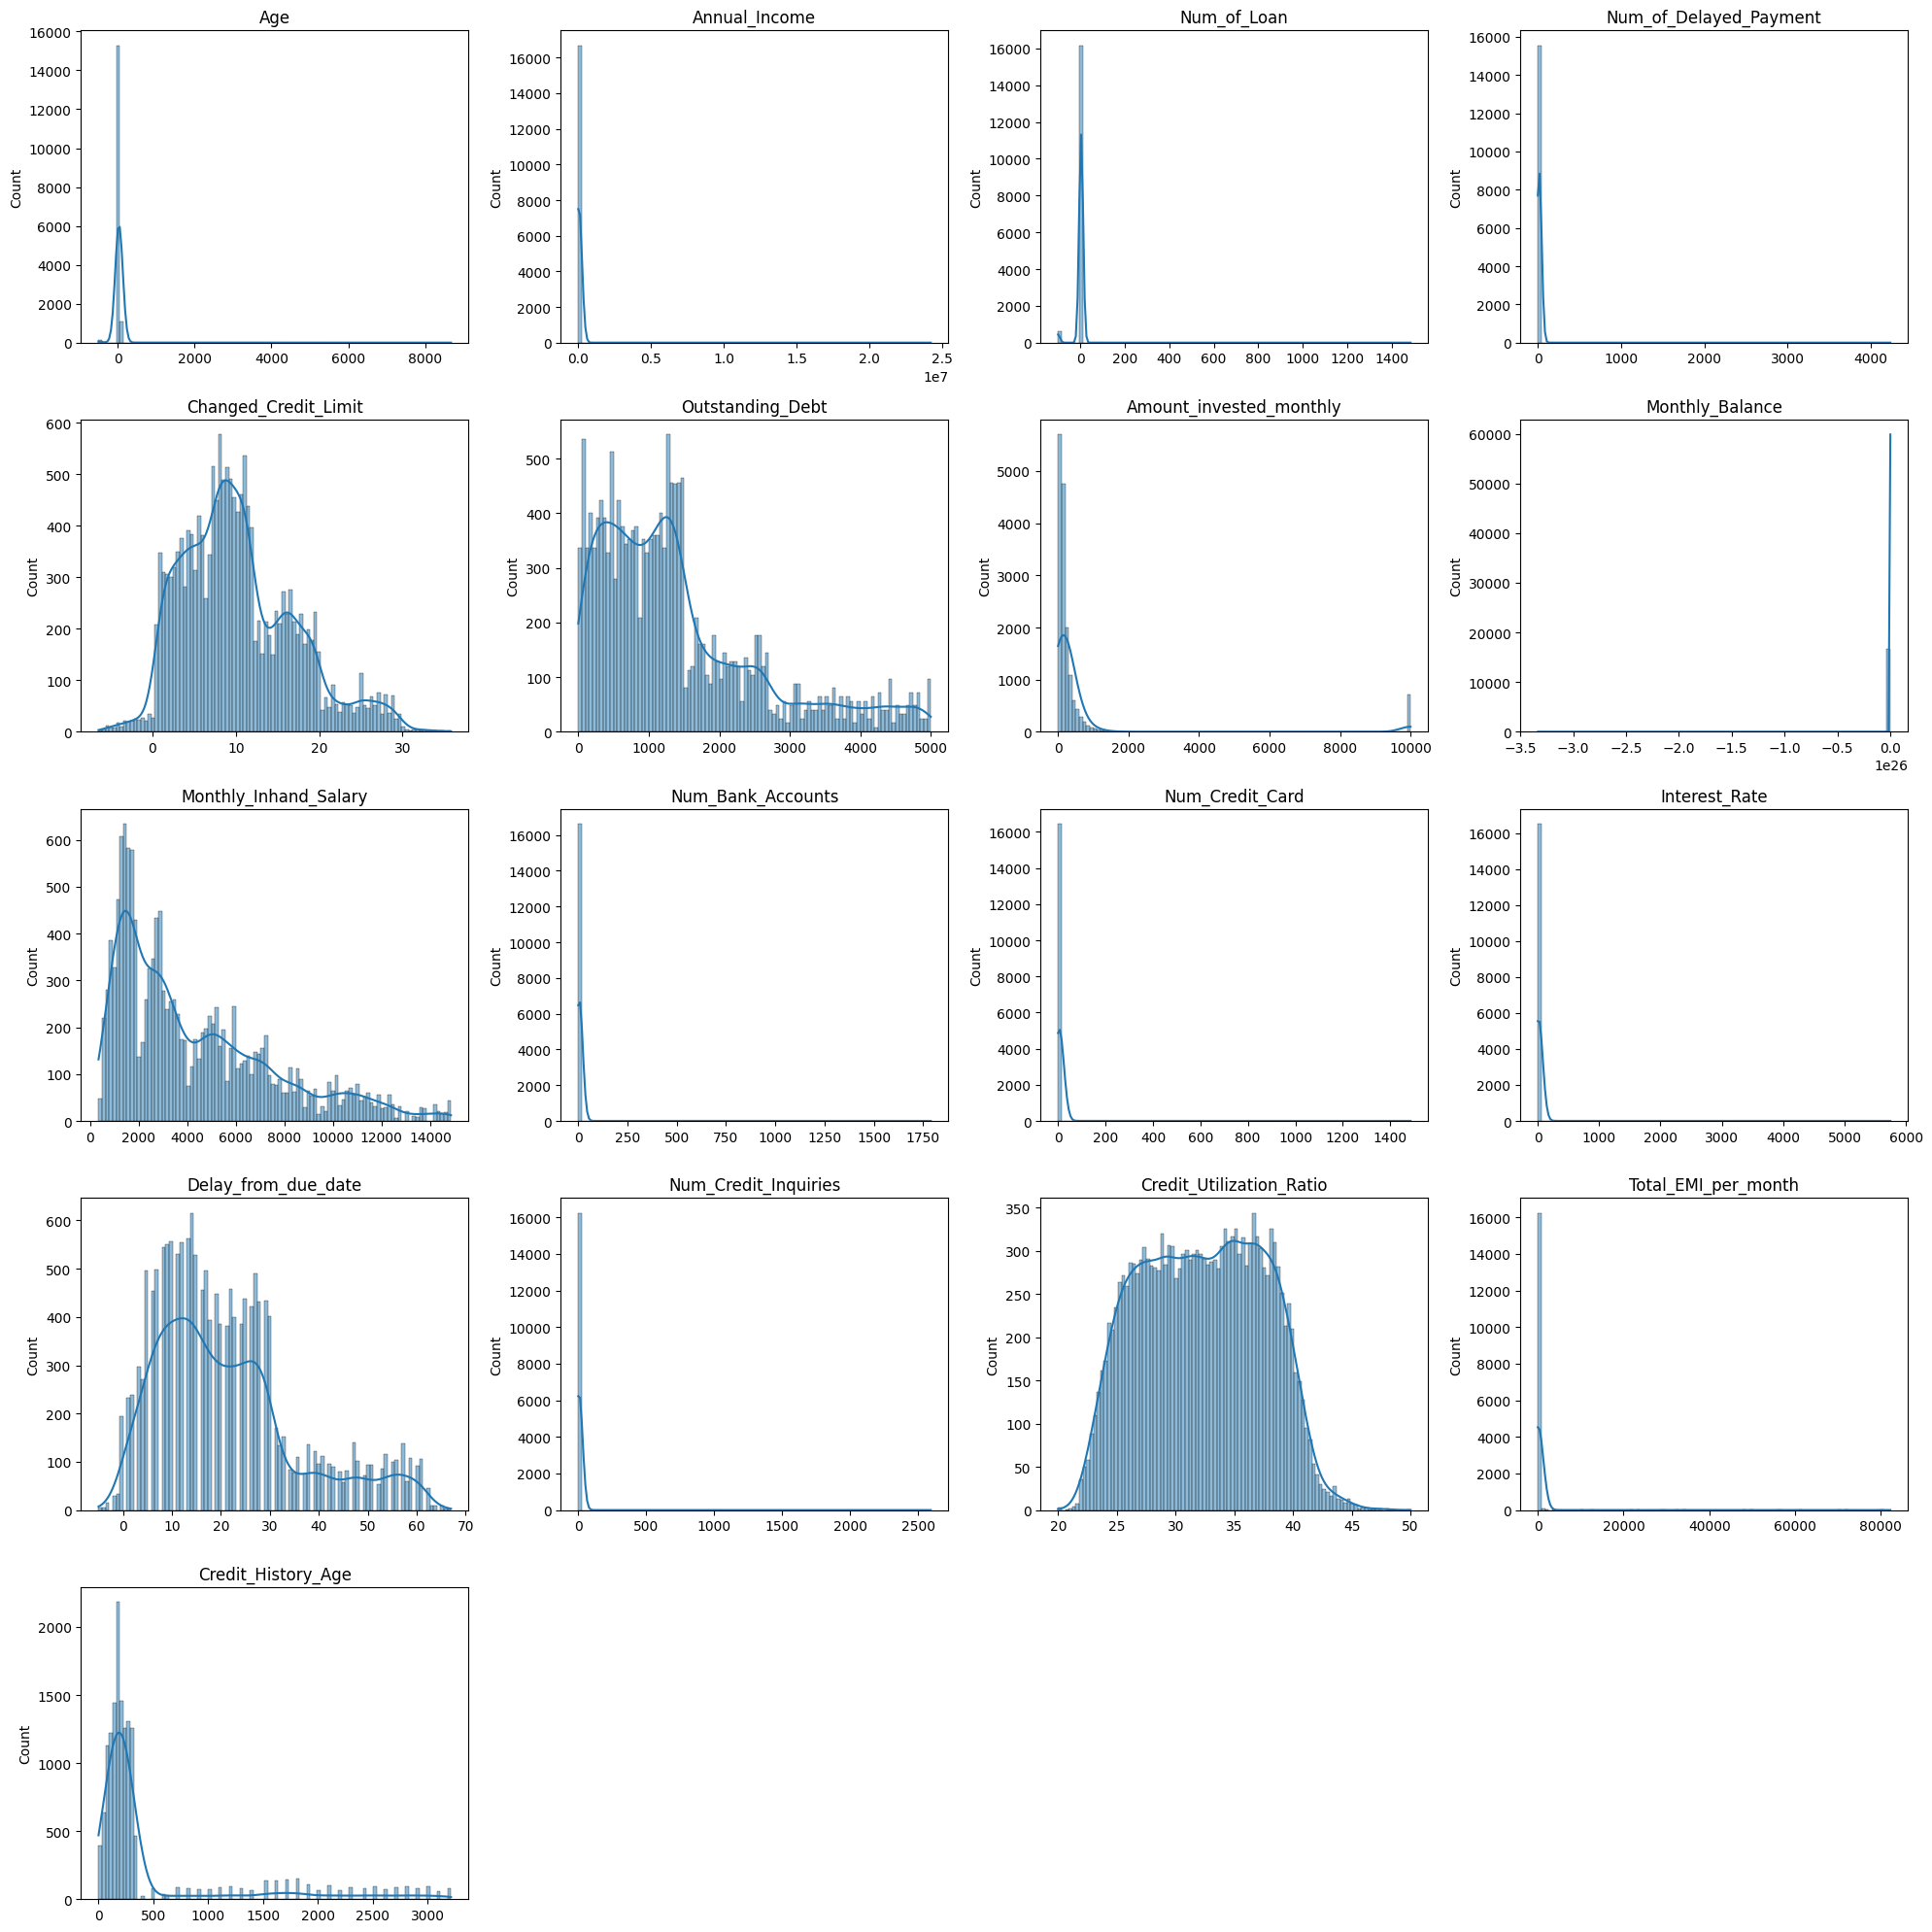

In [ ]:
# Select only the columns from numeric_like_cols that are actually numeric
numeric_cols_for_plotting = data[numeric_like_cols].select_dtypes(include=np.number).columns.tolist()

plot_histogram(data, numeric_cols_for_plotting, rows=5, cols=4)

##Pre-processing data

In [ ]:
#Missing values handling:

# Ensure all numeric-like columns are numeric before filling missing values
for col in numeric_like_cols:
    if col in data.columns:
        # Remove all non-numeric characters except digits, decimal, minus
        data[col] = data[col].astype(str).str.replace(r"[^0-9\.-]", "", regex=True)
        # Convert to numeric, coercing errors to NaN
        data[col] = pd.to_numeric(data[col], errors="coerce")

#Filling by MEAN for: 'Monthly_Inhand_Salary','Num_of_Delayed_Payment', 'Changed_Credit_Limit'
fill_by_mean = ['Monthly_Inhand_Salary','Num_of_Delayed_Payment', 'Changed_Credit_Limit']
for col in fill_by_mean:
    if col in data.columns:
      # Fill NaNs with column mean
      data[col] = data[col].fillna(data[col].mean())

#------------------------------------------------------------------------------

#Filling by MEDIAN for: 'Annual_Income', 'Interest_Rate', 'Total_EMI_per_month'
fill_by_median = ['Annual_Income', 'Interest_Rate', 'Total_EMI_per_month']
for col in fill_by_median:
    if col in data.columns:
      # Fill NaNs with median
      data[col] = data[col].fillna(data[col].median())

In [ ]:
#As the histogram shown we can see outliers
#Using the IQR to detect outliers and remove with
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [ ]:
data = remove_outliers(data, numeric_like_cols)

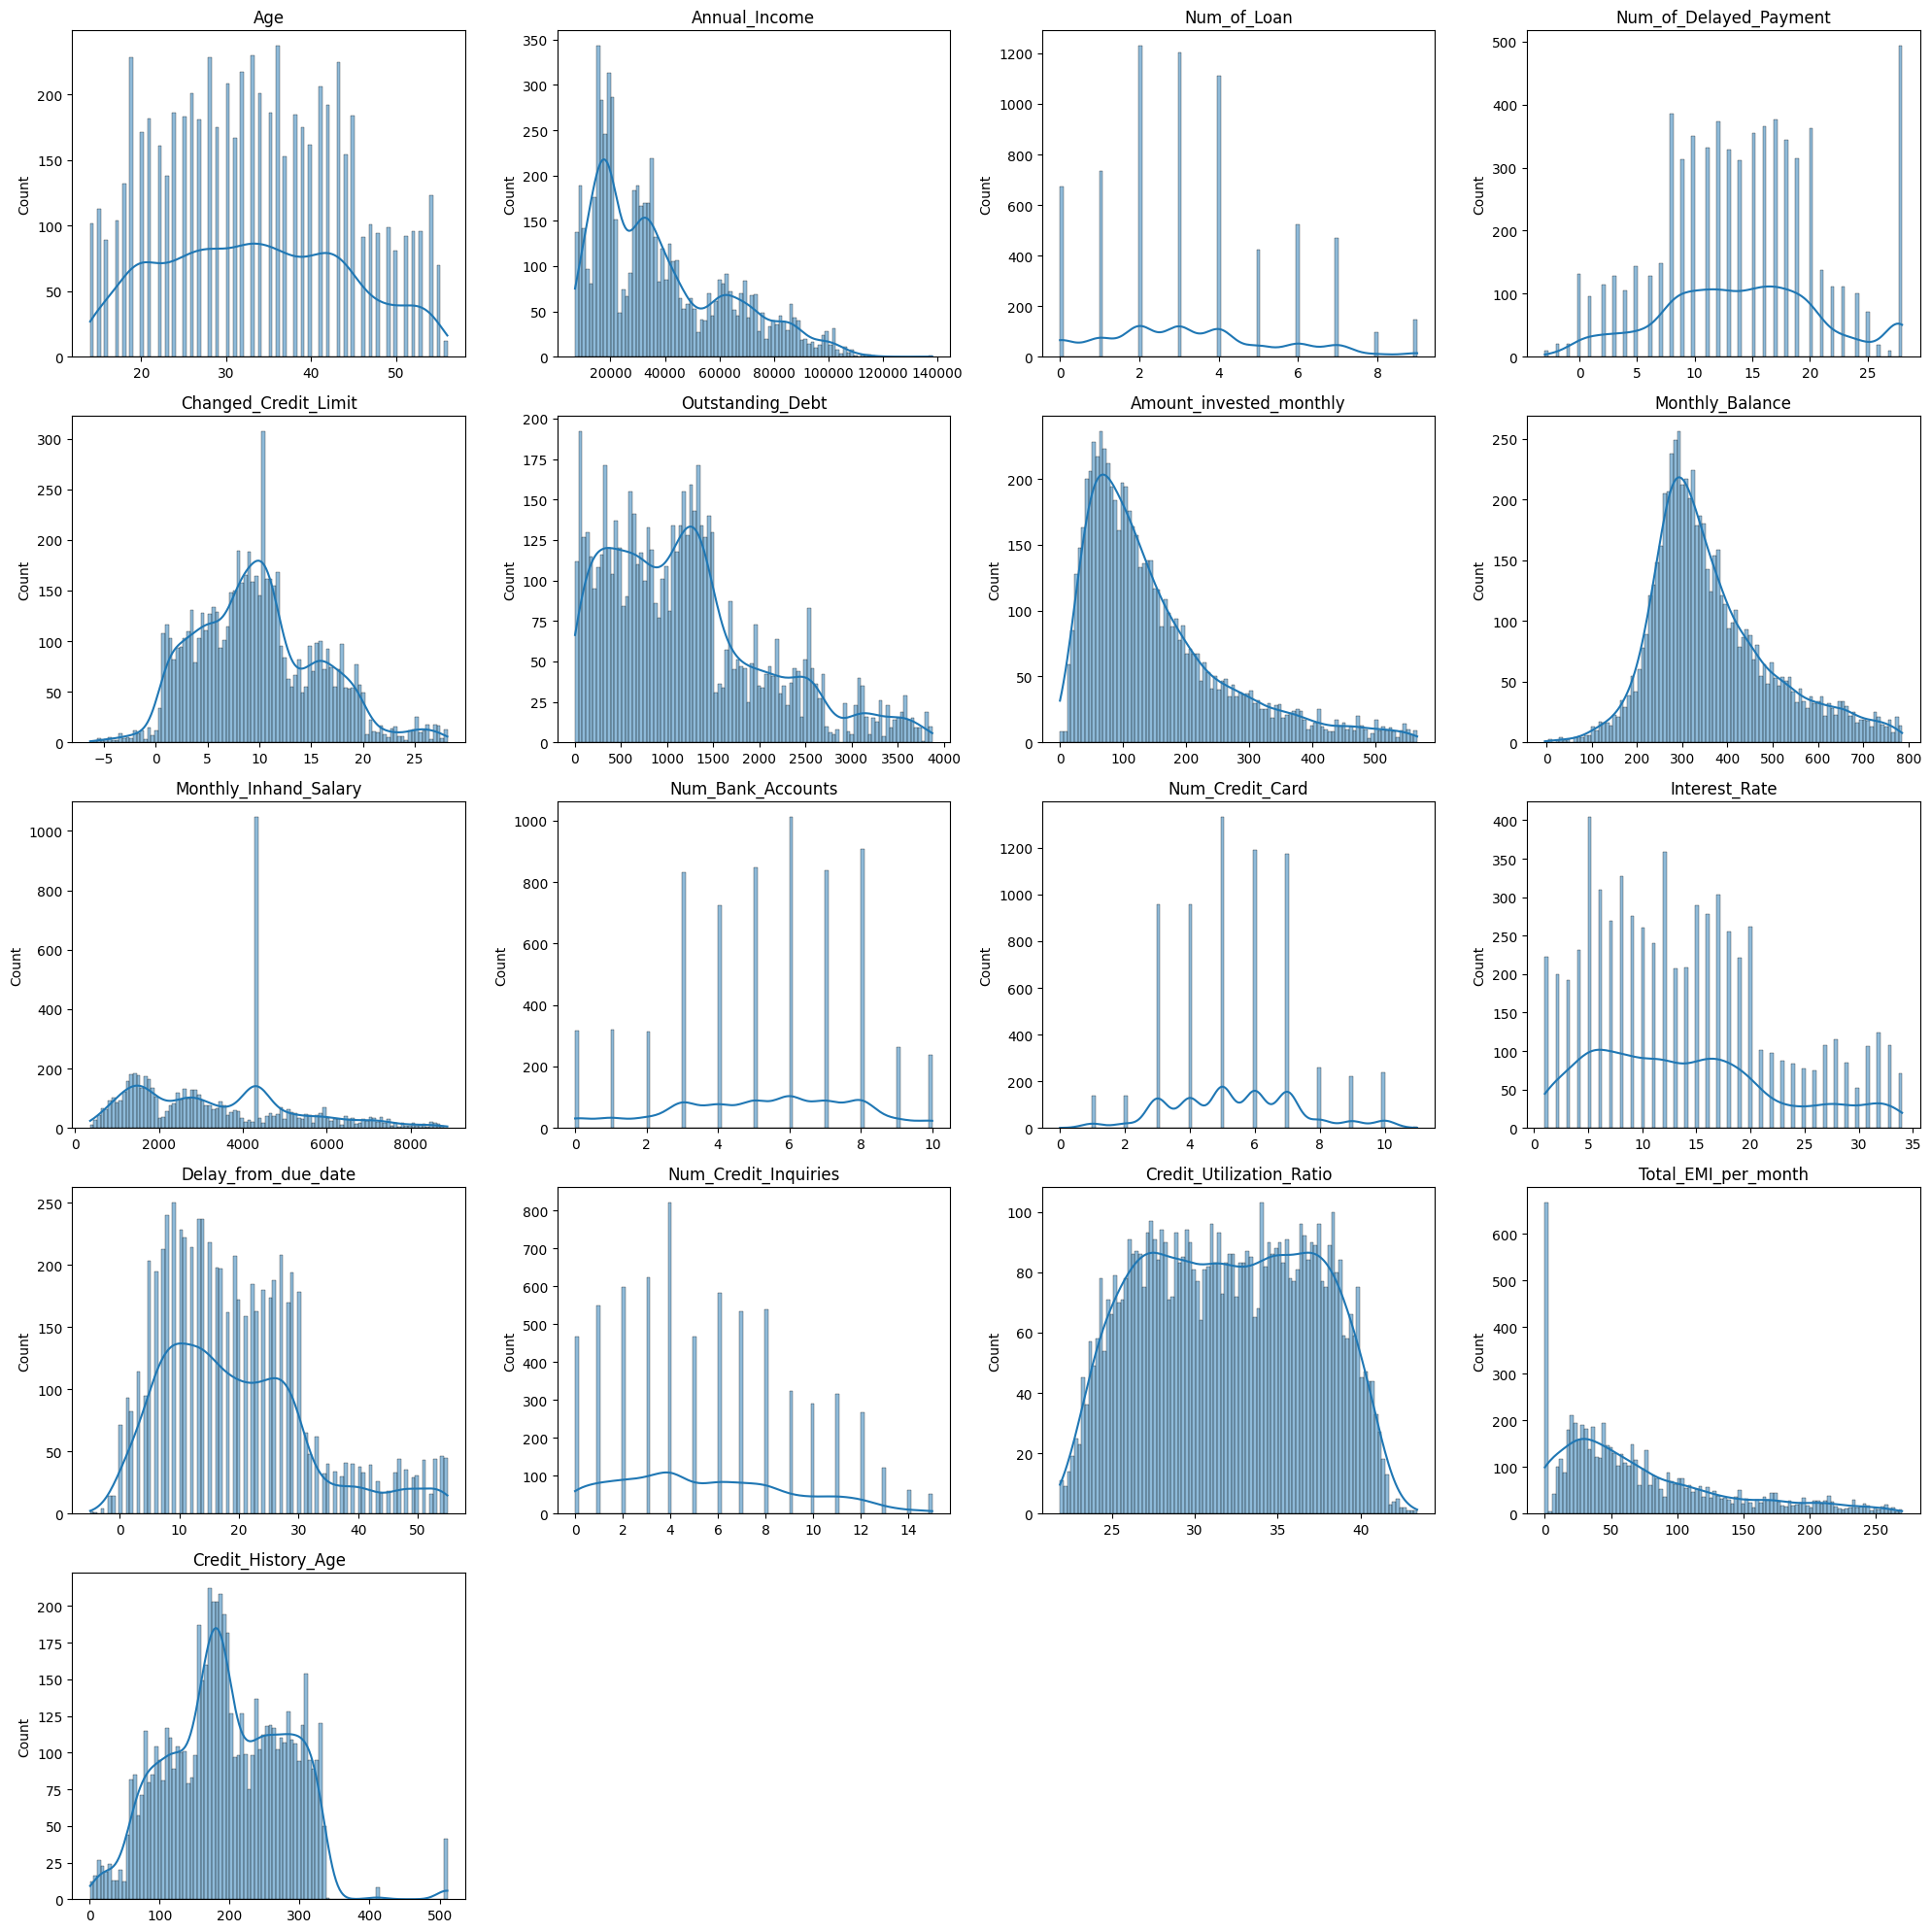

In [ ]:
plot_histogram(data, numeric_cols_for_plotting, rows=5, cols=4)

Credit_Score
Standard    3599
Poor        1912
Good        1100
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Credit_Score'>

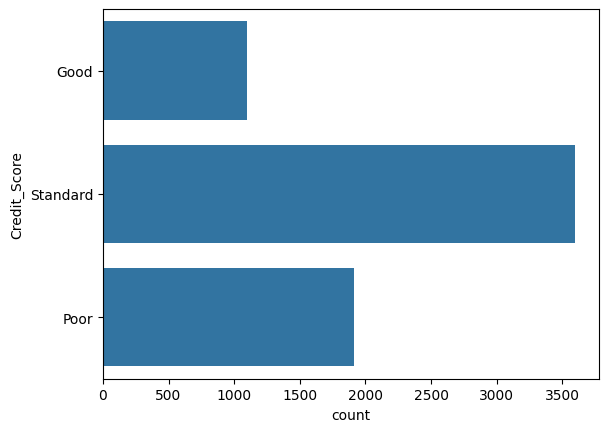

In [ ]:
#Explore the categorical columns:
print(data['Credit_Score'].value_counts())
sns.countplot(data['Credit_Score'])

In [ ]:
for col in categorical_cols:
    print(data[col].value_counts())


Occupation
Media Manager    482
Journalist       467
nan              460
Writer           447
Mechanic         436
Lawyer           432
Scientist        419
Developer        415
Doctor           411
Entrepreneur     410
Teacher          404
Architect        398
Manager          364
Musician         361
Accountant       357
Engineer         348
Name: count, dtype: int64
Type_of_Loan
nan                                                                                                                          673
Credit-Builder Loan                                                                                                          101
Debt Consolidation Loan                                                                                                       95
Mortgage Loan                                                                                                                 88
Not Specified                                                                                     

In [ ]:
print(data.columns)

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [ ]:
# One-Hot Encoding for small-cardinality columns
one_hot_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
data = pd.get_dummies(data, columns=one_hot_cols, dummy_na=True)

In [ ]:
# Label Encoding for high-cardinality columns
le = LabelEncoder()
data['Type_of_Loan'] = data['Type_of_Loan'].fillna('Unknown')
data['Type_of_Loan'] = le.fit_transform(data['Type_of_Loan'])

In [ ]:
#Extract the data into csv
data.to_csv('processed_data.csv', index=False)

In [ ]:
#Download the processed data
from google.colab import files
files.download('processed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
processed_data = pd.read_csv('processed_data.csv')

In [ ]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6611 entries, 0 to 6610
Data columns (total 53 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 6611 non-null   int64  
 1   Annual_Income                                       6611 non-null   float64
 2   Monthly_Inhand_Salary                               6611 non-null   float64
 3   Num_Bank_Accounts                                   6611 non-null   int64  
 4   Num_Credit_Card                                     6611 non-null   int64  
 5   Interest_Rate                                       6611 non-null   int64  
 6   Num_of_Loan                                         6611 non-null   int64  
 7   Type_of_Loan                                        6611 non-null   int64  
 8   Delay_from_due_date                                 6611 non-null   int64  
 9

In [ ]:
X = processed_data.drop('Credit_Score', axis=1)


In [ ]:
#label encode for y
le = LabelEncoder()
y = le.fit_transform(processed_data['Credit_Score'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numeric_like_cols] = scaler.fit_transform(X_train[numeric_like_cols])
X_test[numeric_like_cols] = scaler.transform(X_test[numeric_like_cols])

##Machine Learning Algorithms for classification approaches

Using Logistics Regression



Using Support Vector Machine


Using Decision Tree

In [ ]:
#Logistics Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6757369614512472


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

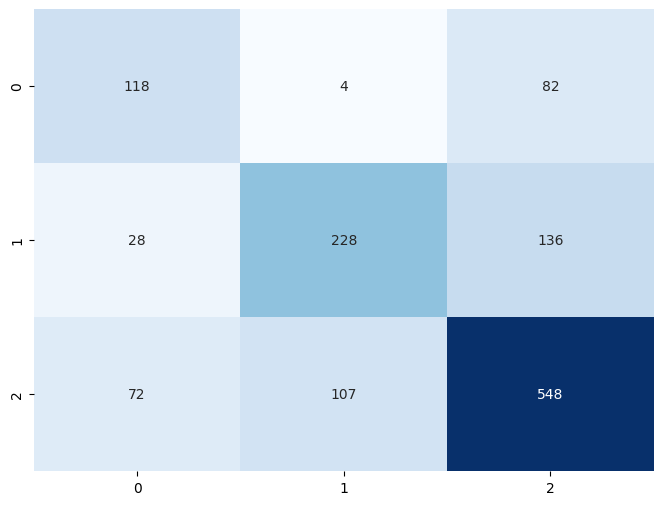

In [ ]:
#Classification matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7241118669690099


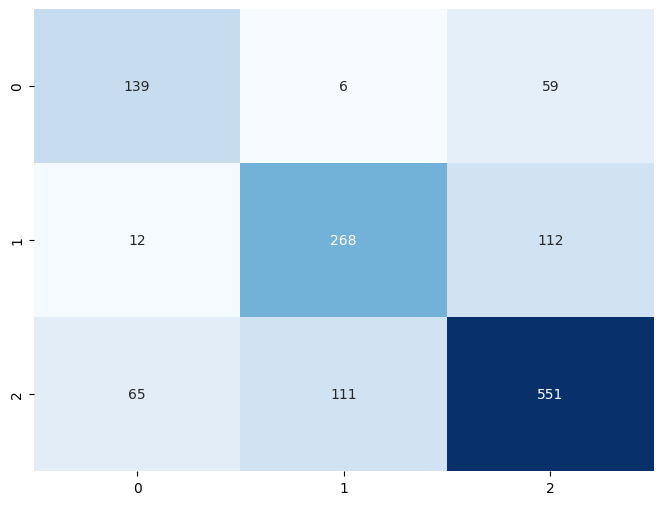

In [ ]:
#Confussion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.show()

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5495086923658352


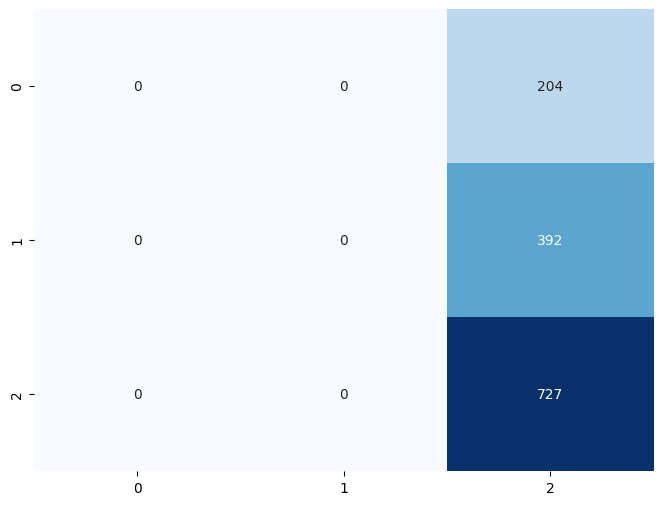

In [ ]:
#COnfussion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.show()

##Build the feedforward neural network for classification

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Accuracy, AUC

In [ ]:
#Add the model
model = Sequential()


In [ ]:
#Add input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Add hidden layers
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

In [ ]:
#Add output layer
#3 classes with softmax activation function
model.add(Dense(3, activation='softmax'))

In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'] )

In [ ]:
#Add early stopping
es = EarlyStopping( monitor='val_loss',   # monitor validation loss
                    patience=5,           # stop if no improvement after 5 epochs
                    restore_best_weights=True)


In [ ]:
#Add the model
model = Sequential()

#Add input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

#Add hidden layers
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

#Add output layer
#3 classes with softmax activation function
model.add(Dense(3, activation='softmax'))

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'] )

#Add early stopping
es = EarlyStopping( monitor='val_loss',   # monitor validation loss
                    patience=5,           # stop if no improvement after 5 epochs
                    restore_best_weights=True)

In [ ]:
#Train the model
model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)

Epoch 1/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4090 - loss: 28.3042 - val_accuracy: 0.5520 - val_loss: 3.6709
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4342 - loss: 6.3006 - val_accuracy: 0.5558 - val_loss: 2.8115
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4432 - loss: 3.0373 - val_accuracy: 0.6030 - val_loss: 0.8574
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4779 - loss: 1.9112 - val_accuracy: 0.5955 - val_loss: 0.8698
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5149 - loss: 1.4317 - val_accuracy: 0.5907 - val_loss: 0.8593
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5475 - loss: 1.1698 - val_accuracy: 0.6163 - val_loss: 0.9015
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5646 - loss: 1.0646 - val_accuracy: 0.6030 - val_loss: 0.8707
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5854 - loss: 1.0290 - val_ac

MOdle enhancement for this model has been completed separatedly on another notebook

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.43      0.49       204
           1       0.67      0.55      0.60       392
           2       0.68      0.79      0.73       727

    accuracy                           0.66      1323
   macro avg       0.64      0.59      0.61      1323
weighted avg       0.66      0.66      0.66      1323



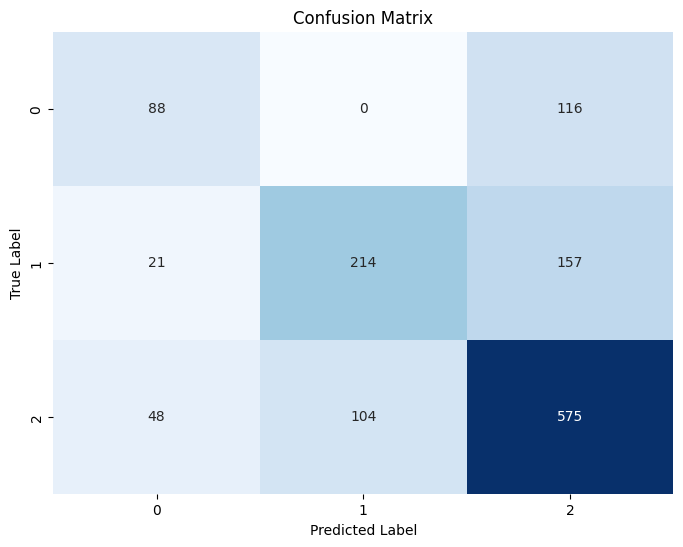

In [ ]:
# Get predictions (from probabilities to class indices)
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert softmax output to class indices

# y_test is already integer labels, no need for np.argmax
y_true = y_test

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


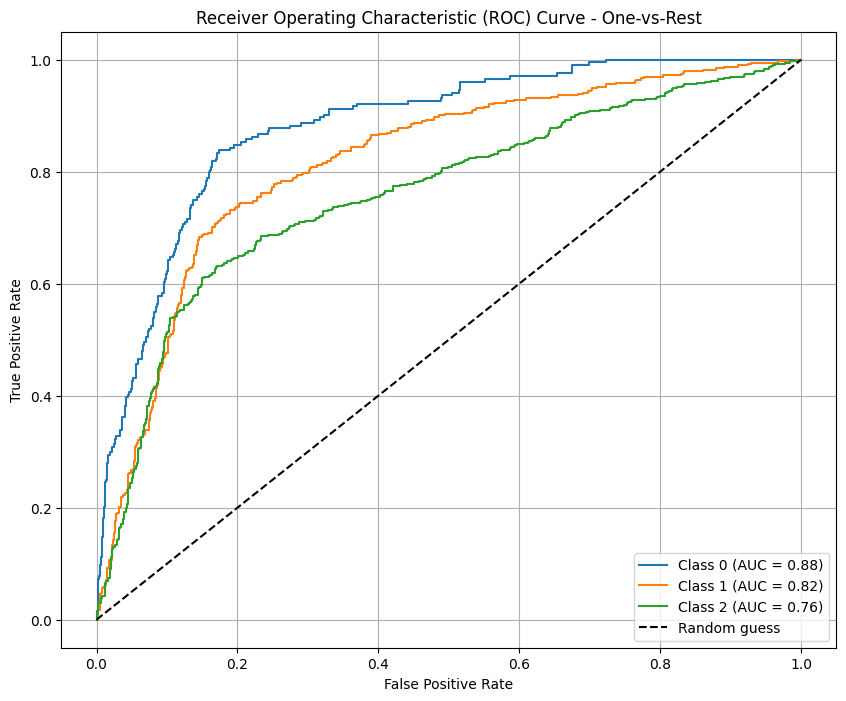

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# y_test is 1D integer labels
# y_pred_probs is model.predict(X_test), shape (n_samples, n_classes)

# Binarize the true labels for one-vs-rest ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# Assuming loss, accuracy, y_true, and y_pred are available from cell HP2AoML3IKko
from sklearn.metrics import accuracy_score, classification_report


loss, accuracy = model.evaluate(X_test, y_test)
print("--- Final Model Evaluation ---")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# If ROC AUC values are needed, you would calculate them here as done in cell mDpn1CZdThss
# and print them. For example:
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize
# import numpy as np
#
# y_test_bin = label_binarize(y_true, classes=np.unique(y_true))
# n_classes = y_test_bin.shape[1]
#
# print("\nROC AUC per class (One-vs-Rest):")
# for i in range(n_classes):
#     fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i]) # Assuming y_pred_probs from HP2AoML3IKko
#     roc_auc = auc(fpr, tpr)
#     print(f"  Class {i}: {roc_auc:.4f}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6430 - loss: 0.7289
--- Final Model Evaluation ---
Test Loss: 0.7221
Test Accuracy: 0.6629

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.43      0.49       204
           1       0.67      0.55      0.60       392
           2       0.68      0.79      0.73       727

    accuracy                           0.66      1323
   macro avg       0.64      0.59      0.61      1323
weighted avg       0.66      0.66      0.66      1323



In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

class RNNModel(Model):
    def __init__(self, num_classes=3, lstm_units=64, hidden_units=32, dropout_rate=0.3):
        super(RNNModel, self).__init__()
        # Layers
        self.lstm = LSTM(lstm_units, activation="tanh")
        self.dropout = Dropout(dropout_rate)
        self.hidden = Dense(hidden_units, activation="relu")
        self.output_layer = Dense(num_classes, activation="softmax")

    def call(self, inputs, training=False):
        x = self.lstm(inputs)
        if training:
            x = self.dropout(x, training=training)
        x = self.hidden(x)
        return self.output_layer(x)


# Instantiate model
model = RNNModel(num_classes=3, lstm_units=64, hidden_units=32, dropout_rate=0.3)

# Compile
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(learning_rate=0.002),
    metrics=["accuracy"]
)

# Early stopping callback
es = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

In [ ]:
# Reshape X_train and X_test for LSTM input

# Ensure all values are numeric
X_train = X_train.apply(pd.to_numeric, errors="coerce").fillna(0).to_numpy(dtype=np.float32)
X_test = X_test.apply(pd.to_numeric, errors="coerce").fillna(0).to_numpy(dtype=np.float32)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))



In [ ]:
#Compile
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)


history=model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=1)

Epoch 1/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5166 - loss: 1.0321 - val_accuracy: 0.5473 - val_loss: 0.9862
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5437 - loss: 0.9836 - val_accuracy: 0.5435 - val_loss: 0.8795
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5705 - loss: 0.8777 - val_accuracy: 0.6541 - val_loss: 0.8040
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.6173 - loss: 0.8282 - val_accuracy: 0.6682 - val_loss: 0.7795
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.6191 - loss: 0.8316 - val_accuracy: 0.6229 - val_loss: 0.8035
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.6256 - loss: 0.8289 - val_accuracy: 0.6749 - val_loss: 0.7433
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6513 - loss: 0.7892 - val_accuracy: 0.6720 - val_loss: 0.7527
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6434 - loss: 0.8053 - 

In [ ]:
model.summary()

Model: "rnn_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,227 (223.55 KB)

 Trainable params: 19,075 (74.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,152 (149.04 KB)

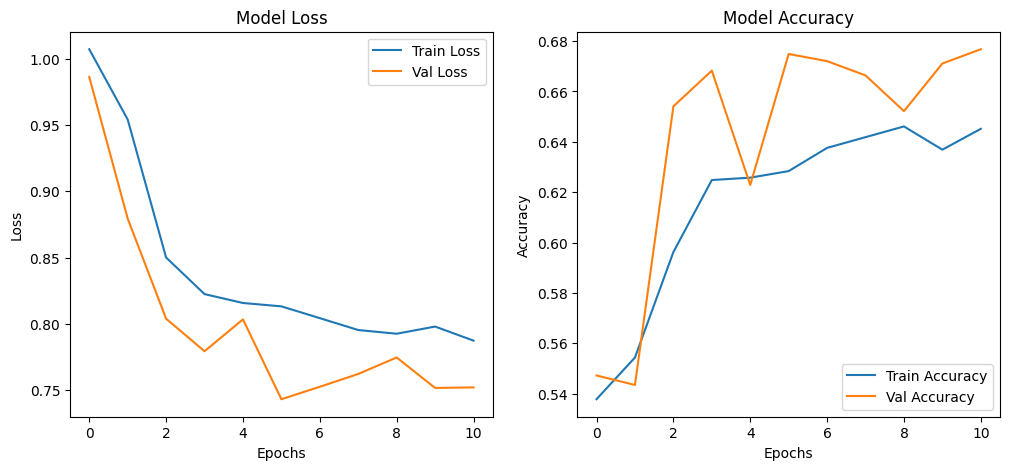

In [ ]:
# Plot Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

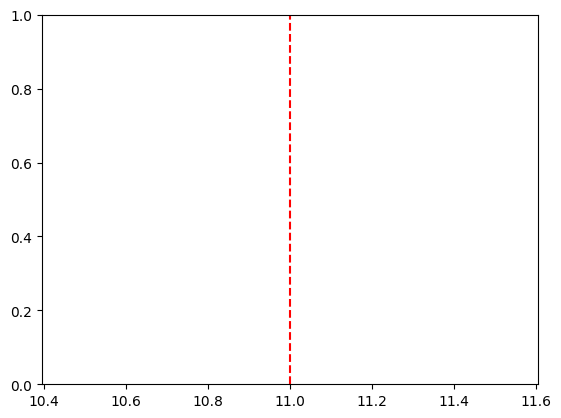

In [ ]:
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
plt.axvline(best_epoch, color='r', linestyle='--', label=f'Best Epoch = {best_epoch}')


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


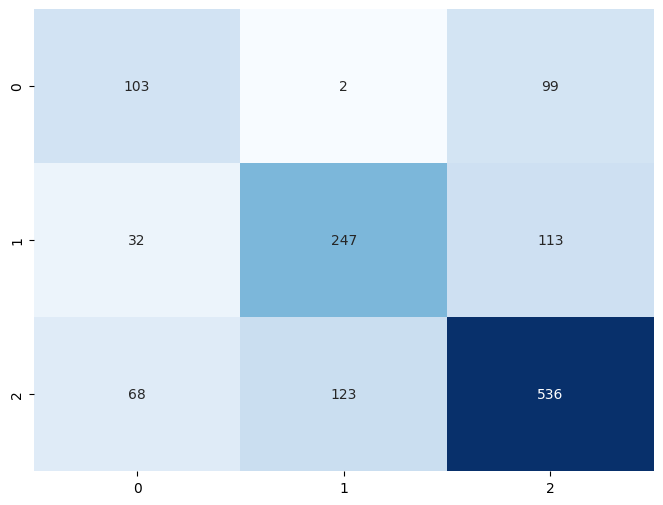

In [ ]:
#Classification matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
#

Accuracy: 0.6696900982615268
Recall: 0.6696900982615268
Precision: 0.6687368334941713
F1 Score: 0.6690006450482091


In [ ]:
feature_names = X.columns
# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert y_test if it was one-hot encoded
y_true = y_test if len(y_test.shape) == 1 else np.argmax(y_test, axis=1)

# Flatten X_test for LSTM shape (samples × features)
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Convert back to DataFrame with feature names
df_results = pd.DataFrame(X_test_flat, columns=feature_names)
df_results["true_label"] = y_true
df_results["pred_label"] = y_pred
df_results["correct"] = df_results["true_label"] == df_results["pred_label"]

# Show all features
print("✅ Correctly classified samples (all features):")
print(df_results[df_results["correct"]].head())

print("\n❌ Incorrectly classified samples (all features):")
print(df_results[~df_results["correct"]].head())


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
✅ Correctly classified samples (all features):
        Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
2 -0.040518      -0.768198              -0.867795           0.714655   
4  0.793896      -0.860579              -1.128274           0.714655   
6  0.237620      -0.521374              -0.805608          -0.864739   
7 -1.245783       1.466624               1.370008          -0.469891   
9 -0.967645      -0.251790               0.505616          -0.075042   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Type_of_Loan  \
2         1.868203       2.138093     0.318453          88.0   
4         1.354097       1.082313     1.682366         121.0   
6         0.839991      -1.263866    -0.590823         414.0   
7        -0.188220      -1.029248    -0.136185         405.0   
9         0.325886      -0.208086     0.318453          28.0   

   Delay_from_due_date  Num_of_Delayed_Payment  ...  \
2             2.241664                0.

##RNN Improvement

In [ ]:
#Add stacked LSTMS layers for deeper sequence learning and batchnormalization
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization

#using inheritance
class StackedLSTMRNNModel(RNNModel):
 def __init__(self, num_classes=3, lstm_units=64, hidden_units=32, dropout_rate=0.3):
        super(StackedLSTMRNNModel, self).__init__(num_classes, lstm_units, hidden_units, dropout_rate)

        # Additional LSTM and BatchNorm layers
        self.lstm1 = LSTM(lstm_units, return_sequences=True, activation="tanh")
        self.batchnorm1 = BatchNormalization()
        self.lstm2 = LSTM(32, activation="tanh")
        self.batchnorm2 = BatchNormalization()

        # Redefine or extend hidden layers if desired
        self.hidden = Dense(hidden_units, activation="relu")
        self.output_layer = Dense(num_classes, activation="softmax")

def call(self, inputs, training=False):
        # Pass through stacked LSTMs
        x = self.lstm1(inputs)
        x = self.batchnorm1(x, training=training)
        x = self.lstm2(x)
        x = self.batchnorm2(x, training=training)

        # Dropout + hidden layers
        if training:
            x = self.dropout(x, training=training)
        x = self.hidden(x)
        return self.output_layer(x)

In [ ]:
model2 = StackedLSTMRNNModel(num_classes=3, lstm_units=64, hidden_units=32, dropout_rate=0.3)

model2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(learning_rate=0.002),
    metrics=["accuracy"]
)

history2=model2.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'stacked_lstmrnn_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5237 - loss: 1.0195 - val_accuracy: 0.5473 - val_loss: 0.9813
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5401 - loss: 0.9855 - val_accuracy: 0.5463 - val_loss: 0.9345
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5610 - loss: 0.8971 - val_accuracy: 0.6361 - val_loss: 0.8332
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6196 - loss: 0.8212 - val_accuracy: 0.6361 - val_loss: 0.7841
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6237 - loss: 0.8181 - val_accuracy: 0.6626 - val_loss: 0.7639
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6429 - loss: 0.8015 - val_accuracy: 0.6522 - val_loss: 0.7774
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6393 - loss: 0.7970 - val_accuracy: 0.6758 - val_loss: 0.7487
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6446 - loss: 0.7892 - val_accuracy

In [ ]:
model2.summary()


Model: "stacked_lstmrnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,227 (223.55 KB)

 Trainable params: 19,075 (74.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,152 (149.04 KB)

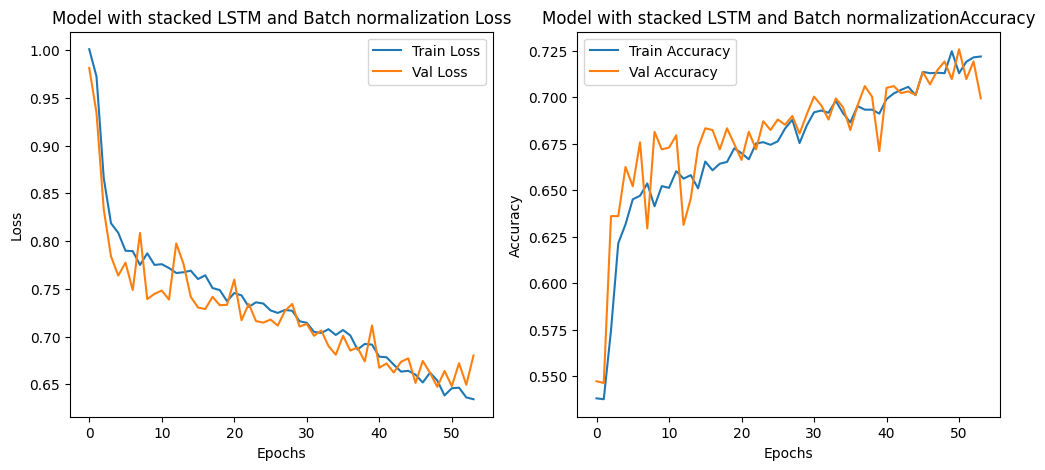

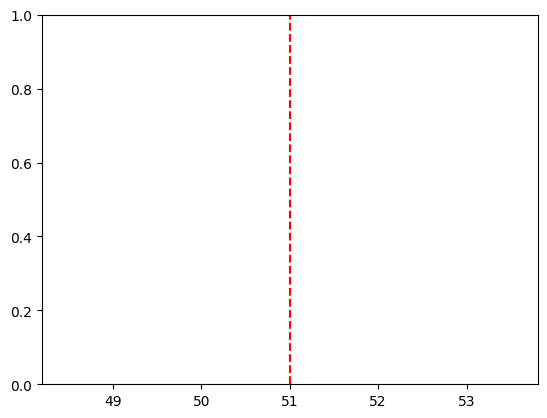

In [ ]:
# Plot Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.title('Model with stacked LSTM and Batch normalization Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.title('Model with stacked LSTM and Batch normalizationAccuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

best_epoch_2 = history2.history['val_accuracy'].index(max(history2.history['val_accuracy'])) + 1
plt.axvline(best_epoch_2, color='r', linestyle='--', label=f'Best Epoch = {best_epoch}')

In [ ]:
y_pred_2 = model2.predict(X_test)
y_pred_2 = np.argmax(y_pred_2, axis=1)

accuracy = accuracy_score(y_test, y_pred_2)
recall = recall_score(y_test, y_pred_2, average='weighted')
precision = precision_score(y_test, y_pred_2, average='weighted')
f1 = f1_score(y_test, y_pred_2, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Accuracy: 0.6931216931216931
Recall: 0.6931216931216931
Precision: 0.6942991643002872
F1 Score: 0.69106797863468


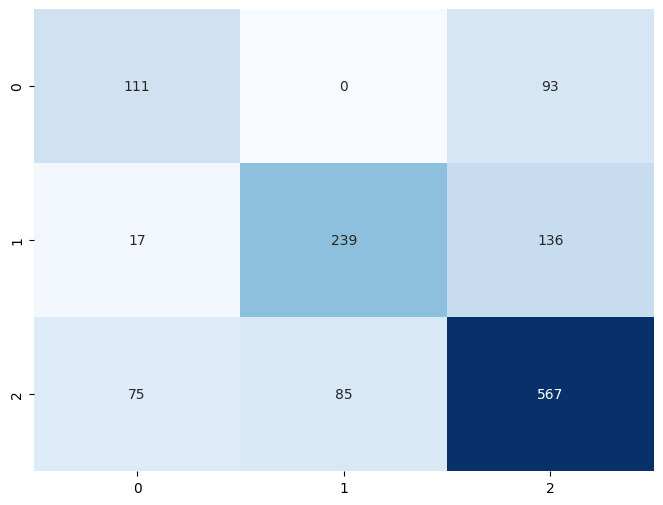

In [ ]:
#classification metrix
cm2 = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.show()



In [ ]:
#Add Bidirectional Layer to model with more dropout + batch normalization
from tensorflow.keras.layers import Bidirectional
class IntermediateRNNModel(RNNModel):
    def __init__(self, num_classes=3):
        super(IntermediateRNNModel, self).__init__(num_classes)
        self.lstm1 = Bidirectional(LSTM(64, return_sequences=True))
        self.lstm2 = Bidirectional(LSTM(32))
        self.dropout1 = Dropout(0.3)
        self.hidden = Dense(64, activation="relu")
        self.bn = BatchNormalization()
        self.dropout2 = Dropout(0.3)
        self.output_layer = Dense(num_classes, activation="softmax")

    def call(self, inputs, training=False):
        x = self.lstm1(inputs)
        x = self.lstm2(x)
        if training:
            x = self.dropout1(x, training=training)
        x = self.hidden(x)
        x = self.bn(x, training=training)
        if training:
            x = self.dropout2(x, training=training)
        return self.output_layer(x)


In [ ]:
model3 = IntermediateRNNModel(num_classes=3)

model3.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(learning_rate=0.002),
    metrics=["accuracy"]
)

In [ ]:
history3 = model3.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)


Epoch 1/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 24s 180ms/step - accuracy: 0.6368 - loss: 0.7870 - val_accuracy: 0.6824 - val_loss: 0.7401
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 42s 190ms/step - accuracy: 0.6542 - loss: 0.7744 - val_accuracy: 0.6805 - val_loss: 0.7364
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 25s 190ms/step - accuracy: 0.6486 - loss: 0.7910 - val_accuracy: 0.6796 - val_loss: 0.7449
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 32s 122ms/step - accuracy: 0.6510 - loss: 0.7722 - val_accuracy: 0.6777 - val_loss: 0.7785
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.6527 - loss: 0.7654 - val_accuracy: 0.6871 - val_loss: 0.7551
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.6535 - loss: 0.7709 - val_accuracy: 0.6550 - val_loss: 0.8295
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.6603 - loss: 0.7677 - val_accuracy: 0.6720 - val_loss: 0.7292
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.6649 - los

In [ ]:
y_pred_3 = model3.predict(X_test)
y_pred_3 = np.argmax(y_pred_3, axis=1)

accuracy = accuracy_score(y_test, y_pred_3)
recall = recall_score(y_test, y_pred_3, average='weighted')
precision = precision_score(y_test, y_pred_3, average='weighted')
f1 = f1_score(y_test, y_pred_3, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
Accuracy: 0.7074829931972789
Recall: 0.7074829931972789
Precision: 0.7132465635620073
F1 Score: 0.7089095312857785


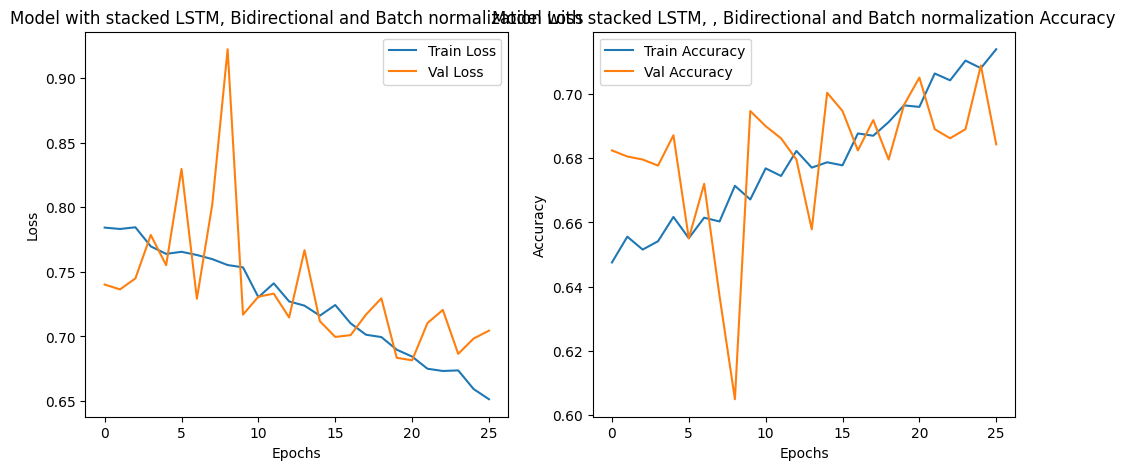

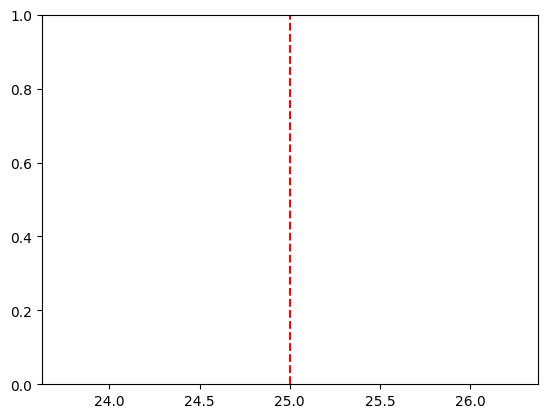

In [ ]:
# Plot Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Val Loss')
plt.title('Model with stacked LSTM, Bidirectional and Batch normalization Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Val Accuracy')
plt.title('Model with stacked LSTM, , Bidirectional and Batch normalization Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

best_epoch_3 = history3.history['val_accuracy'].index(max(history3.history['val_accuracy'])) + 1
plt.axvline(best_epoch_3, color='r', linestyle='--', label=f'Best Epoch = {best_epoch}')


In [ ]:
#Attempt to use Hybrid CNN + LSTM:
from tensorflow.keras.layers import Conv1D, MaxPooling1D
class AdvancedRNNModel(IntermediateRNNModel):
    def __init__(self, num_classes=3):
        super(AdvancedRNNModel, self).__init__(num_classes)
        self.conv = Conv1D(64, kernel_size=3, activation="relu", padding="same")
        self.pool = MaxPooling1D(pool_size=2)
        self.lstm = LSTM(64)
        self.hidden = Dense(64, activation="relu")
        self.output_layer = Dense(num_classes, activation="softmax")

    def call(self, inputs, training=False):
        x = self.conv(inputs)
        x = self.pool(x)
        x = self.lstm(x)
        if training:
            x = self.dropout1(x, training=training)
        x = self.hidden(x)
        x = self.bn(x, training=training)
        if training:
            x = self.dropout2(x, training=training)
        return self.output_layer(x)


In [ ]:
#Compile
model4 = AdvancedRNNModel(num_classes=3)

model4.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(learning_rate=0.002),
    metrics=["accuracy"]
)

#Training
history4 = model4.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'advanced_rnn_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.4349 - loss: 1.0949 - val_accuracy: 0.5473 - val_loss: 0.9752
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5642 - loss: 0.8990 - val_accuracy: 0.5473 - val_loss: 0.9573
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6204 - loss: 0.8376 - val_accuracy: 0.5473 - val_loss: 0.9050
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.6112 - loss: 0.8282 - val_accuracy: 0.6191 - val_loss: 0.9503
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6255 - loss: 0.8351 - val_accuracy: 0.6276 - val_loss: 0.7773
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6583 - loss: 0.7811 - val_accuracy: 0.6257 - val_loss: 0.7841
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.6410 - loss: 0.7989 - val_accuracy: 0.6682 - val_loss: 0.8468
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6697 - loss: 0.7778 - val_accurac

In [ ]:
#model accuracy
y_pred_4 = model4.predict(X_test)
y_pred_4 = np.argmax(y_pred_4, axis=1)

accuracy = accuracy_score(y_test, y_pred_4)
recall = recall_score(y_test, y_pred_4, average='weighted')
precision = precision_score(y_test, y_pred_4, average='weighted')
f1 = f1_score(y_test, y_pred_4, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy: 0.6893424036281179
Recall: 0.6893424036281179
Precision: 0.6881173923502861
F1 Score: 0.6754815736213224


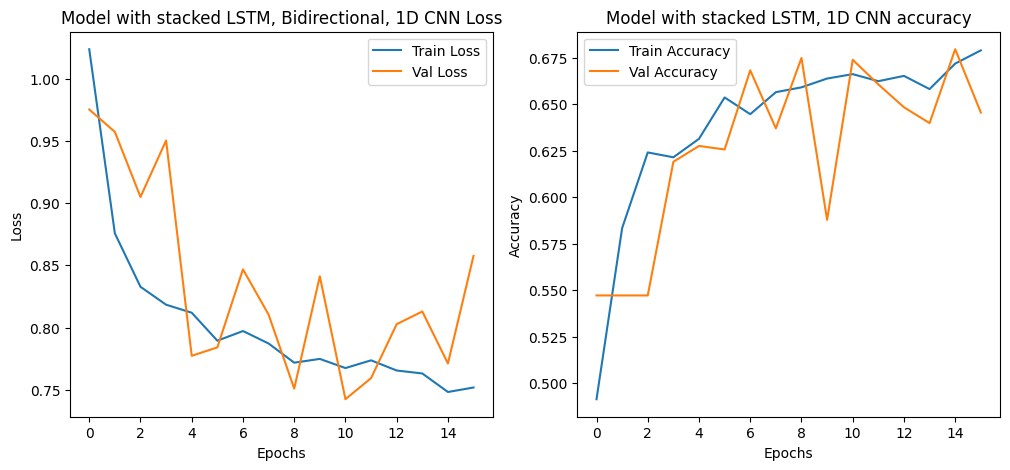

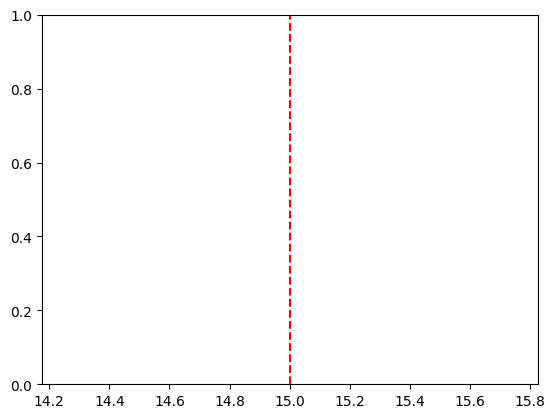

In [ ]:
#plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history4.history['loss'], label='Train Loss')
plt.plot(history4.history['val_loss'], label='Val Loss')
plt.title('Model with stacked LSTM, Bidirectional, 1D CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label='Val Accuracy')
plt.title('Model with stacked LSTM, 1D CNN accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

best_epoch_4 = history4.history['val_accuracy'].index(max(history4.history['val_accuracy'])) + 1
plt.axvline(best_epoch_4, color='r', linestyle='--', label=f'Best Epoch = {best_epoch}')

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, GRU, BatchNormalization, Conv1D, MaxPooling1D

# ------------------- Simple Attention -------------------
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def call(self, inputs):
        # Attention weights
        score = tf.nn.softmax(tf.reduce_sum(inputs, axis=-1, keepdims=True), axis=1)
        context = tf.reduce_sum(score * inputs, axis=1)
        return context

# ------------------- Advanced Base Model -------------------
class AdvancedRNNModel(Model):
    def __init__(self, num_classes=3):
        super(AdvancedRNNModel, self).__init__()
        self.conv = Conv1D(64, kernel_size=3, activation="relu")
        self.pool = MaxPooling1D(pool_size=2)
        self.dropout1 = Dropout(0.3)
        self.bn = BatchNormalization()
        self.dropout2 = Dropout(0.3)
        self.hidden = Dense(64, activation="relu")
        self.output_layer = Dense(num_classes, activation="softmax")

    def call(self, inputs, training=False):
        x = self.conv(inputs)
        x = self.pool(x)
        if training:
            x = self.dropout1(x, training=training)
        x = self.hidden(x)
        x = self.bn(x, training=training)
        if training:
            x = self.dropout2(x, training=training)
        return self.output_layer(x)

# ------------------- Very Advanced GRU + Attention -------------------
class VeryAdvancedRNNModel(AdvancedRNNModel):
    def __init__(self, num_classes=3):
        super(VeryAdvancedRNNModel, self).__init__(num_classes)
        self.gru = GRU(64, return_sequences=True)
        self.attention = AttentionLayer()

    def call(self, inputs, training=False):
        x = self.conv(inputs)
        x = self.pool(x)
        x = self.gru(x)
        x = self.attention(x)
        if training:
            x = self.dropout1(x, training=training)
        x = self.hidden(x)
        x = self.bn(x, training=training)
        if training:
            x = self.dropout2(x, training=training)
        return self.output_layer(x)


In [ ]:
timesteps = X_train.shape[1]
num_features = X_train.shape[2]
model5 = VeryAdvancedRNNModel(num_classes=3)
model5.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=["accuracy"]
)

model.build(input_shape=(None, timesteps, num_features))
model5.summary()


Model: "very_advanced_rnn_model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_15                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer_3               │ ?                      │   0 (unbuilt) │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history5 = model5.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'very_advanced_rnn_model_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.4538 - loss: 1.2300 - val_accuracy: 0.5520 - val_loss: 0.9109
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5981 - loss: 0.8845 - val_accuracy: 0.6531 - val_loss: 0.7960
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6246 - loss: 0.8255 - val_accuracy: 0.6607 - val_loss: 0.7783
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.6145 - loss: 0.8308 - val_accuracy: 0.6758 - val_loss: 0.7522
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6408 - loss: 0.7989 - val_accuracy: 0.6824 - val_loss: 0.7438
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6557 - loss: 0.7935 - val_accuracy: 0.6853 - val_loss: 0.7373
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6415 - loss: 0.8051 - val_accuracy: 0.6777 - val_loss: 0.7446
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6413 - loss: 0.7858 - val_accuracy

In [ ]:
#accuracy
y_pred_5 = model5.predict(X_test)
y_pred_5 = np.argmax(y_pred_5, axis=1)

accuracy = accuracy_score(y_test, y_pred_5)
recall = recall_score(y_test, y_pred_5, average='weighted')

precision = precision_score(y_test, y_pred_5, average='weighted')
f1 = f1_score(y_test, y_pred_5, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy: 0.6976568405139834
Recall: 0.6976568405139834
Precision: 0.694871630070262
F1 Score: 0.6945701284159874


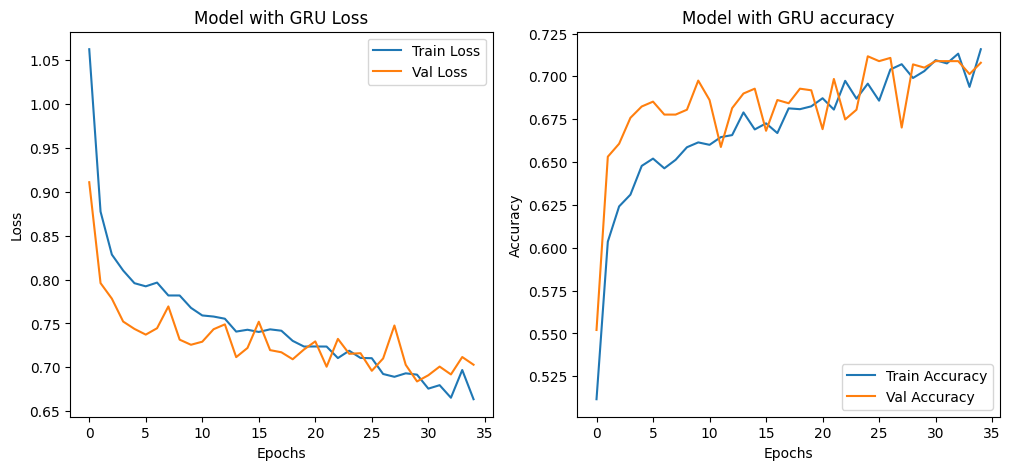

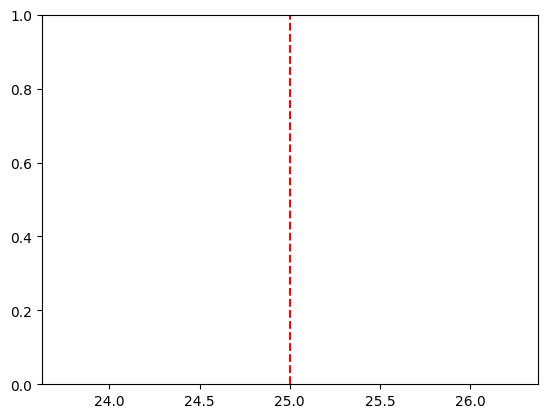

In [ ]:
#plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history5.history['loss'], label='Train Loss')
plt.plot(history5.history['val_loss'], label='Val Loss')
plt.title('Model with GRU Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label='Val Accuracy')
plt.title('Model with GRU accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

best_epoch_5 = history5.history['val_accuracy'].index(max(history5.history['val_accuracy'])) + 1
plt.axvline(best_epoch_5, color='r', linestyle='--', label=f'Best Epoch = {best_epoch}')

#Conclusion
EmbedMLP achieved the best results, outperforming traditional ML, RNN, and Transformer
models with a balanced performance across all credit classes.32
Transformer models were not ideal for tabular data due to their architecture, which expects
sequential or contextual relationships. They suffered from overfitting and unstable training
despite tuning.
RNN and LSTM architectures showed moderate success but were less effective for static
tabular data compared to feedforward approaches.
Traditional ML models (Logistic Regression, Decision Tree, SVM) underperformed,
highlighting the advantages of deep learning for complex, nonlinear credit data.
Data preprocessing (handling missing values, encoding categorical variables, and scaling
numeric features) was critical to model stability and accuracy.
Future improvements could focus on:
Feature engineering for the “Standard” credit class (where misclassification persisted),
Using hybrid architectures combining embeddings with attention,
Exploring ensemble approaches or explainable AI techniques for model transparency in
credit risk assessment.